## **ML-Model to detect gender, age** ##


### **Stepwise ML-model development**  
The notebook include following steps:
* Data Collection
* Data Pre-processing 
* Feature Engineering
* Model Selection
* Model Evaluation

### **Step-01 Data Collection**  
In this step the data is loaded and explored. The data is understood with basic graphs and to check if the dataset is balanced.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv(r"C:\Users\Usman\Desktop\AI PHASE 2\cv-valid-test.csv") 
df[df['age'].notna()].head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
5,cv-valid-test/sample-000005.mp3,down below in the darkness were hundreds of pe...,4,1,twenties,male,us,NaN
6,cv-valid-test/sample-000006.mp3,strange images passed through my mind,3,0,twenties,male,NaN,NaN
7,cv-valid-test/sample-000007.mp3,the sheep had taught him that,2,0,thirties,male,NaN,NaN


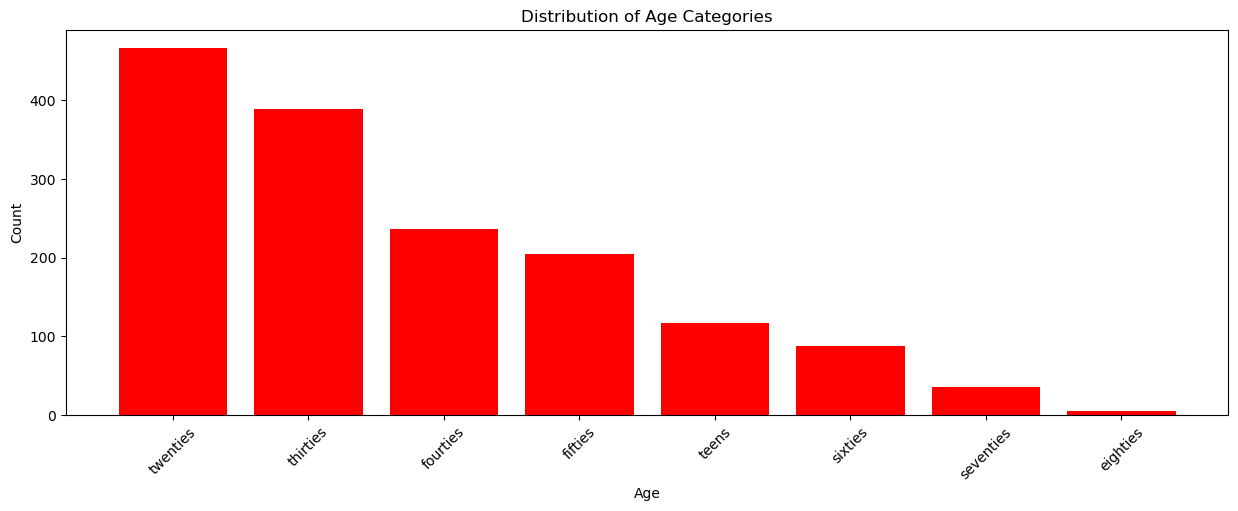

In [2]:
import matplotlib.pyplot as plt

# Filter out rows where 'age' is not NaN
filtered_df = df[df['age'].notna()]

# Define the order of age categories
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties']

# Count the occurrences of each age category
age_counts = filtered_df['age'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 5))
plt.bar(age_counts.index, age_counts.values, color='red')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')

# Set the order of categories on the x-axis
plt.xticks(age_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


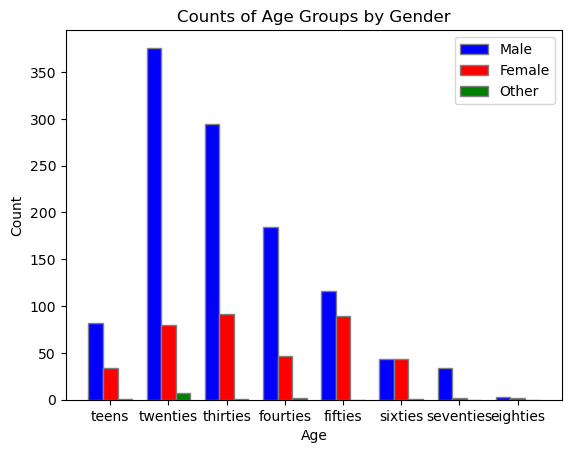

In [3]:
import matplotlib.pyplot as plt

# Filter the DataFrame to remove NaN values in the 'age' column
filtered_df = df[df['age'].notna()]

# Define the order of the x-axis categories
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties']

# Initialize counts for each age group and gender
age_counts = {age: {'male': 0, 'female': 0, 'other': 0} for age in age_order}

# Count occurrences of each category in 'age' column for each 'gender'
for age_group in age_order:
    age_counts[age_group]['male'] = len(filtered_df[(filtered_df['age'] == age_group) & (filtered_df['gender'] == 'male')])
    age_counts[age_group]['female'] = len(filtered_df[(filtered_df['age'] == age_group) & (filtered_df['gender'] == 'female')])
    age_counts[age_group]['other'] = len(filtered_df[(filtered_df['age'] == age_group) & (filtered_df['gender'] == 'other')])

# Define positions for bars
bar_width = 0.25
r1 = range(len(age_order))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

# Create the bar plot
plt.bar(r1, [age_counts[age]['male'] for age in age_order], color='blue', width=bar_width, edgecolor='grey', label='Male')
plt.bar(r2, [age_counts[age]['female'] for age in age_order], color='red', width=bar_width, edgecolor='grey', label='Female')
plt.bar(r3, [age_counts[age]['other'] for age in age_order], color='green', width=bar_width, edgecolor='grey', label='Other')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Counts of Age Groups by Gender')
plt.xticks([r + bar_width for r in range(len(age_order))], age_order)

# Add legend and grid
plt.legend()


# Show plot
plt.show()


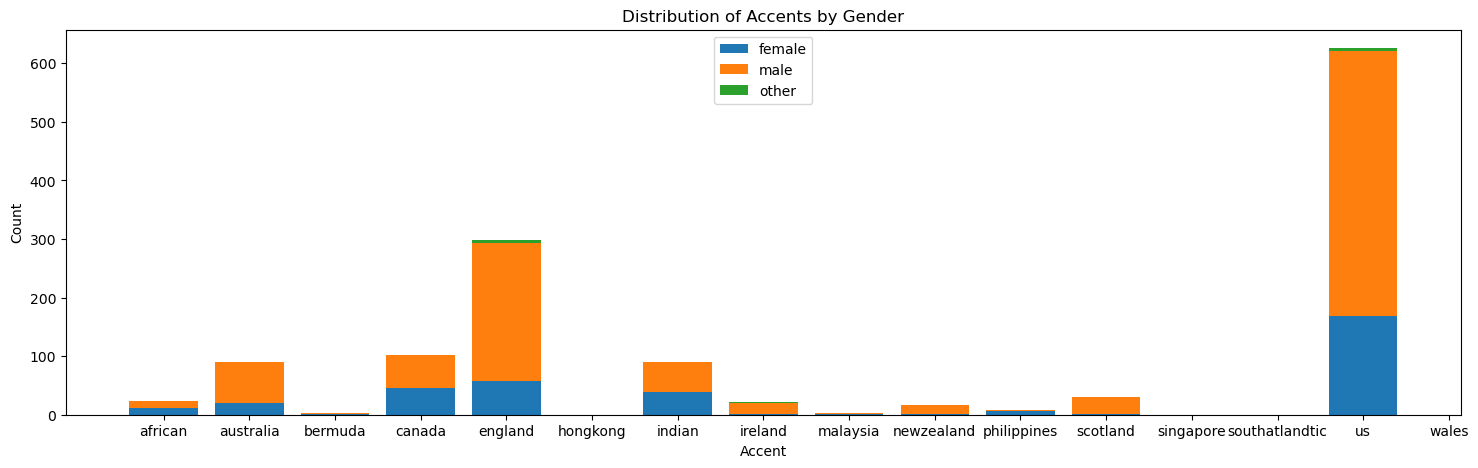

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing 'accent' and 'gender' columns

# Filter out rows where 'accent' is not NaN
df_filtered = df[df['accent'].notna()]  # Replace 'accent_column_name' with the actual column name

# Group by 'accent' and 'gender' and count occurrences
grouped = df_filtered.groupby(['accent', 'gender']).size().unstack()

# Plot
fig, ax = plt.subplots(figsize=(18, 5))

# Iterate over each gender category and plot a stacked bar for each accent
bottom = None
for gender in grouped.columns:
    ax.bar(grouped.index, grouped[gender], bottom=bottom, label=gender)
    bottom = grouped[gender] if bottom is None else bottom + grouped[gender]

# Set labels and title
ax.set_xlabel('Accent')
ax.set_ylabel('Count')
ax.set_title('Distribution of Accents by Gender')
ax.legend()

plt.show()


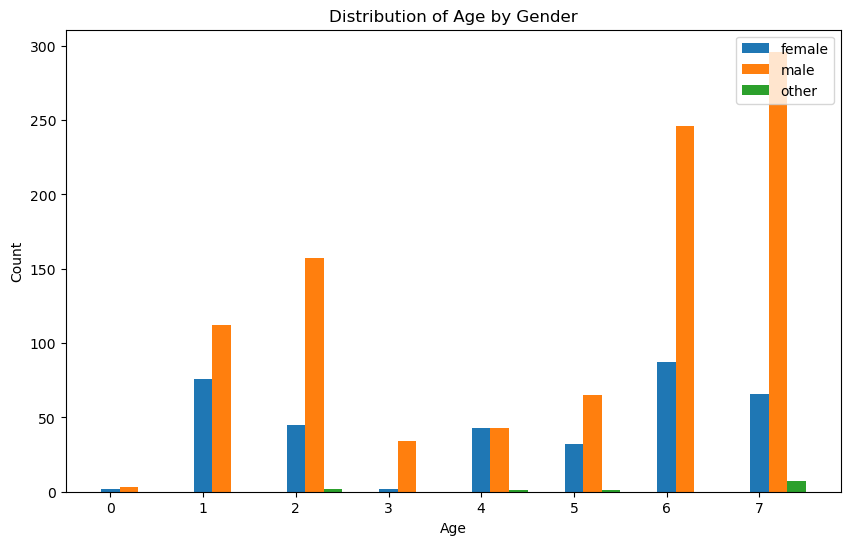

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Remove rows with missing values in 'age', 'gender', and 'accent' columns
df_filtered = df[df['age'].notna() & df['gender'].notna() & df['accent'].notna()]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Count occurrences of each age group by gender
age_counts_by_gender = df_filtered.groupby(['age', 'gender']).size().unstack()

# Reorder age groups
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties']

# Plot bars for each gender
for i, gender in enumerate(age_counts_by_gender.columns):
    ax.bar(
        [x + i * 0.2 for x in range(len(age_order))],  # Adjusting width of bars
        age_counts_by_gender[gender], 
        width=0.2,  # Shortening the width of bars
        label=gender,
        color=f'C{i}'  # Blueish color
    )

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age by Gender')
ax.legend()

plt.show()


### Data Pre-processing  
#### Data Cleaning  
In this step we drop entries(samples) with NaN values. The columns that doesn't contribute(unnecessary) to the model are removed. The attributes are checked for its datatypes and changed to an approapriate type.

In [6]:
#we extract the columns that we think useful are
df = df[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age,gender
0,cv-valid-test/sample-000001.mp3,twenties,male
1,cv-valid-test/sample-000003.mp3,twenties,male
2,cv-valid-test/sample-000005.mp3,twenties,male
3,cv-valid-test/sample-000006.mp3,twenties,male
4,cv-valid-test/sample-000007.mp3,thirties,male


In [7]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.head()

,filename,age,gender
0,cv-valid-test/sample-000001.mp3,twenties,1.0
1,cv-valid-test/sample-000003.mp3,twenties,1.0
2,cv-valid-test/sample-000005.mp3,twenties,1.0
3,cv-valid-test/sample-000006.mp3,twenties,1.0
4,cv-valid-test/sample-000007.mp3,thirties,1.0


#### **Feature Extraction**

We extract the following features:  
The following features are related to audio quality through which the model will learn more effectively. 

* **Spectral Centroid**: each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame
* **Spectral Bandwidth**: compute 2nd-order spectral bandwidth
* **Spectral Rolloff**: the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below
* **Mel Frequency Cepstral Coefficients (MFCCs)**: a small set of 20 features that describe the overall shape of a spectral envelope


In [8]:
import librosa
ds_path = ""

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    gender = data[data['filename'] == filename].gender.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(gender)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = feature_extraction(data.iloc[0]['filename'])
print("features: ", features)

features:  [1.0, 2363.110587768366, 2442.014562174045, 4577.484631147541, -485.9729, 120.06984, 18.925766, 22.316969, 26.170475, 10.456684, 1.5410587, 7.4243536, 2.6522813, -9.54947, -1.2842348, 4.510566, -3.8151236, -5.117503, 0.84942067, -0.35997394, -1.1878365, 2.7727103, 0.43175936, -4.4032865]


In [9]:
#the function create dataframe to store the feature and label related to each other
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 55001
    
    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["gender", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "label"])

df_features = create_df_features(data)
df_features.head()

1534/1534

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1.0,2363.110588,2442.014562,4577.484631,-485.972900,120.069839,18.925766,22.316969,26.170475,10.456684,...,4.510566,-3.815124,-5.117503,0.849421,-0.359974,-1.187837,2.772710,0.431759,-4.403286,twenties
1,1.0,2644.264959,2748.468148,5367.187500,-588.103088,106.388893,19.169491,25.312468,1.020321,20.175331,...,-6.859980,-7.951331,-8.337333,-6.856142,-2.805744,-6.419114,-6.350870,-1.939447,-2.964418,twenties
2,1.0,2059.264934,2027.237487,3844.232695,-401.671204,132.308975,7.677214,19.505114,20.168219,10.824322,...,-2.037062,-0.507063,-3.501943,-4.953254,-6.940827,-5.202406,-0.321906,-3.445682,-5.890696,twenties
3,1.0,3490.665603,3096.615650,6684.172124,-559.588562,89.208626,-12.495049,32.540150,12.109185,10.346272,...,0.535924,1.264716,-1.473101,0.517995,-0.558837,-3.706164,2.706611,-0.375905,-3.455411,twenties
4,1.0,3158.136066,3213.745972,6322.884909,-402.182495,120.924423,-16.121975,37.154160,-4.684889,18.873652,...,0.667729,2.254137,0.661788,2.334560,-3.770767,4.463132,-4.322121,3.768255,1.248358,thirties


### **Feature Transformation**  

Scaling the features with the scikit-learn StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [11]:
print("Before scaling:", df_features.iloc[0].values[:-1])
print("\nAfter scaling:", x[0])

Before scaling: [1.0 2363.110587768366 2442.014562174045 4577.484631147541 -485.9729
 120.06984 18.925766 22.316969 26.170475 10.456684 1.5410587 7.4243536
 2.6522813 -9.54947 -1.2842348 4.510566 -3.8151236 -5.117503 0.84942067
 -0.35997394 -1.1878365 2.7727103 0.43175936 -4.4032865]

After scaling: [ 0.59267161 -0.46478879 -0.18435579 -0.37729001 -0.44959953  0.18464545
  1.12581513 -0.07350018  1.35867595  0.17771246  0.35270005  1.16854275
  0.7549939  -0.60268243  0.33905996  1.68261538 -0.34345601  0.03250539
  0.8062518   0.63848812  0.49938943  1.09684132  0.54508803 -0.11098082]


In [12]:
df_features['label'].unique()


array(['twenties', 'thirties', 'fifties', 'fourties', 'teens',
       'seventies', 'sixties', 'eighties'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[-1])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


In [14]:
df_features.head()

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1.0,2363.110588,2442.014562,4577.484631,-485.972900,120.069839,18.925766,22.316969,26.170475,10.456684,...,4.510566,-3.815124,-5.117503,0.849421,-0.359974,-1.187837,2.772710,0.431759,-4.403286,twenties
1,1.0,2644.264959,2748.468148,5367.187500,-588.103088,106.388893,19.169491,25.312468,1.020321,20.175331,...,-6.859980,-7.951331,-8.337333,-6.856142,-2.805744,-6.419114,-6.350870,-1.939447,-2.964418,twenties
2,1.0,2059.264934,2027.237487,3844.232695,-401.671204,132.308975,7.677214,19.505114,20.168219,10.824322,...,-2.037062,-0.507063,-3.501943,-4.953254,-6.940827,-5.202406,-0.321906,-3.445682,-5.890696,twenties
3,1.0,3490.665603,3096.615650,6684.172124,-559.588562,89.208626,-12.495049,32.540150,12.109185,10.346272,...,0.535924,1.264716,-1.473101,0.517995,-0.558837,-3.706164,2.706611,-0.375905,-3.455411,twenties
4,1.0,3158.136066,3213.745972,6322.884909,-402.182495,120.924423,-16.121975,37.154160,-4.684889,18.873652,...,0.667729,2.254137,0.661788,2.334560,-3.770767,4.463132,-4.322121,3.768255,1.248358,thirties


### **Feature Selection**  

We use the ANOVA (ANalysis Of VAriance) statistical technique (f_classif) to select the best 22 features.


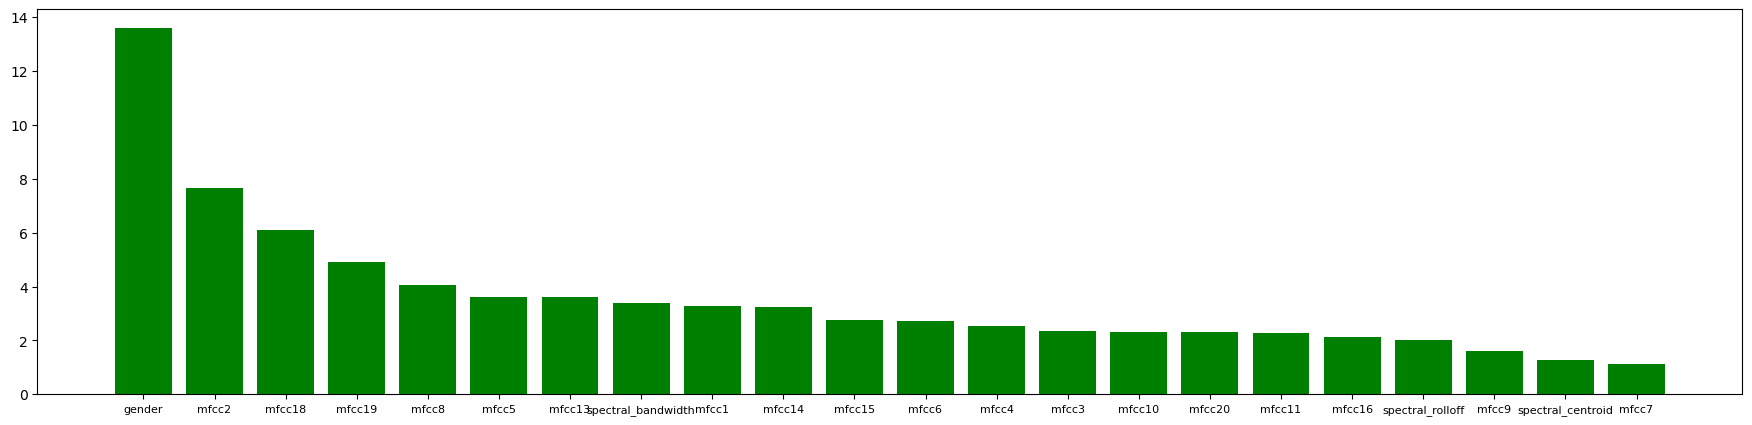

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()


### **Model Selection**  

Using Decision Tree Regression




In [16]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(set(y)) == 1:
            return np.mean(y)

        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_score = float('inf')

        for feature_idx in range(num_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask
                left_y = y[left_mask]
                right_y = y[right_mask]

                if len(left_y) == 0 or len(right_y) == 0:
                    continue

                mse = self.calculate_mse(left_y, right_y)
                if mse < best_score:
                    best_score = mse
                    best_feature = feature_idx
                    best_threshold = threshold

        if best_score == float('inf'):
            return np.mean(y)

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_tree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return (best_feature, best_threshold, left_tree, right_tree)

    def predict_instance(self, x, tree):
        if isinstance(tree, (float, int)):
            return tree
        feature, threshold, left_tree, right_tree = tree
        if x[feature] <= threshold:
            return self.predict_instance(x, left_tree)
        else:
            return self.predict_instance(x, right_tree)

    def predict(self, X):
        return np.array([self.predict_instance(x, self.tree) for x in X])

    def calculate_mse(self, left_y, right_y):
        return (np.mean((left_y - np.mean(left_y))**2) + np.mean((right_y - np.mean(right_y))**2)) / 2

# Instantiate custom Decision Tree Regression class
regressor = DecisionTreeRegressorCustom(max_depth=6)  # Specify the maximum depth of the tree

# Initialize KFold for outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)
fold_counter = 0

results = []
for train_idx, test_idx in outer_cv.split(X_new):
    fold_counter += 1
    
    # Split data into training and test sets
    X_train, X_test = X_new[train_idx], X_new[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model
    regressor.fit(X_train, y_train)

    # Prediction
    pred = regressor.predict(X_test)
    
    # Evaluation on the test set
    mse = mean_squared_error(y_test, pred)
    results.append(mse)
    
    print("\tFold {}, Mean Squared Error on Test data {:.5f}"
          .format(fold_counter, mse))

print('\tAverage Mean Squared Error on Test Set: {:.5f}\n'.format(np.mean(results)))


	Fold 1, Mean Squared Error on Test data 5.24878
	Fold 2, Mean Squared Error on Test data 5.07578
	Fold 3, Mean Squared Error on Test data 5.17082
	Fold 4, Mean Squared Error on Test data 5.11861
	Fold 5, Mean Squared Error on Test data 5.41474
	Average Mean Squared Error on Test Set: 5.20575



### **Model Evaluation**  


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming X_new and y are defined
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = SVC(C=100, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create a DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df


,Actual,Predicted
0,6,6
1,3,7
2,7,7
3,6,6
4,5,6
...,...,...
302,2,1
303,7,7
304,6,6
305,7,7
